In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.preprocessing import label_binarize

In [2]:
sns.set_style('darkgrid')

# Dataset preparation

Creating unified csv file

From Cresci-2017 dataset

This dataset was fetch from twitter API

In [3]:
# Genuine users
gu_df = pd.read_csv('./cresci-2017/genuine_accounts.csv/users.csv', sep = ',')
gu_list = gu_df['id'].values.astype(int)

# Social spambots
ssbots1_df = pd.read_csv('./cresci-2017/social_spambots_1.csv/users.csv', sep = ',')
ssbots1_list = ssbots1_df['id'].values.astype(int)
ssbots2_df = pd.read_csv('./cresci-2017/social_spambots_2.csv/users.csv', sep = ',')
ssbots2_list = ssbots2_df['id'].values.astype(int)
ssbots3_df = pd.read_csv('./cresci-2017/social_spambots_3.csv/users.csv', sep = ',')
ssbots3_list = ssbots3_df['id'].values.astype(int)

# traditional spambots
tsbots1_df = pd.read_csv('./cresci-2017/traditional_spambots_1.csv/users.csv', sep = ',')
tsbots1_list = tsbots1_df['id'].values.astype(int)
tsbots2_df = pd.read_csv('./cresci-2017/traditional_spambots_2.csv/users.csv', sep = ',')
tsbots2_list = tsbots2_df['id'].values.astype(int)
tsbots3_df = pd.read_csv('./cresci-2017/traditional_spambots_3.csv/users.csv', sep = ',')
tsbots3_list = tsbots3_df['id'].values.astype(int)
tsbots4_df = pd.read_csv('./cresci-2017/traditional_spambots_4.csv/users.csv', sep = ',')
tsbots4_list = tsbots4_df['id'].values.astype(int)

# combine social spambots and traditional spambots
ssbots_list = list(ssbots1_list) + list(ssbots2_list) + list(ssbots3_list)
tsbots_list = list(tsbots1_list) + list(tsbots2_list) + list(tsbots3_list) + list(tsbots4_list)

A social spambot is _“a computer algorithm that
automatically produces content and interacts with
humans on social media, trying to emulate and pos-
sibly alter their behavior”_

source: https://aclanthology.org/2021.findings-acl.457.pdf 

In [4]:
gu_df['label'] = 'genuine'

ssbots1_df['label'] = 'social_spambot'
ssbots2_df['label'] = 'social_spambot'
ssbots3_df['label'] = 'social_spambot'

tsbots1_df['label'] = 'traditional_spambot'
tsbots2_df['label'] = 'traditional_spambot'
tsbots3_df['label'] = 'traditional_spambot'
tsbots4_df['label'] = 'traditional_spambot'

# Combine all dataframes
df = pd.concat([
    gu_df,
    ssbots1_df, ssbots2_df, ssbots3_df,
    tsbots1_df, tsbots2_df, tsbots3_df, tsbots4_df
], ignore_index=True)

df['label'].value_counts()

label
social_spambot         4912
genuine                3474
traditional_spambot    2631
Name: count, dtype: int64

### Quick overview of target data

_*statuses_count*_ - number of Tweets per user

_*favourites_count*_ - number of liked Tweets per user

In [5]:
df

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,label
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,...,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0.0,0.0,genuine
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,...,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),NaN,NaN,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0.0,0.0,genuine
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,NaN,en,...,Let me see what your best move is!,NaN,NaN,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0.0,0.0,genuine
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,20. menna: #farida #nyc and the 80s actually y...,NaN,NaN,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0.0,0.0,genuine
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,NaN,en,...,Cosmetologist,NaN,NaN,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0.0,0.0,genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,818079408,Columbia Facil. Mgmt,tmj_cae_facmgmt,41,169,151,0,12,http://t.co/TKb82K4tFJ,en,...,Follow this account for geo-targeted Facilitie...,NaN,NaN,Tue Sep 11 20:00:43 +0000 2012,2012-09-11 22:00:43,2016-03-15 13:49:15,2016-03-15 13:49:15,NaN,NaN,traditional_spambot
11013,846108068,NJ Business/Mgmt,tmj_nj_mgmt,218,332,245,0,31,https://t.co/DByWt4njnT,en,...,Follow this account for geo-targeted Business/...,NaN,NaN,Tue Sep 25 19:35:53 +0000 2012,2012-09-25 21:35:53,2016-03-15 13:49:15,2016-03-15 13:49:15,NaN,NaN,traditional_spambot
11014,857076271,PR Customer Ser.,tmj_ptr_cstsrv,17,530,300,0,8,http://t.co/paWgrkSWfT,en,...,Follow this account for geo-targeted Customer ...,NaN,NaN,Mon Oct 01 21:47:23 +0000 2012,2012-10-01 23:47:23,2016-03-15 13:49:15,2016-03-15 13:49:15,NaN,NaN,traditional_spambot
11015,872126906,PR Soft Dev Java,tmj_ptr_itjava,2,247,202,0,1,http://t.co/OnFSpFHC7G,en,...,Follow this account for geo-targeted Software ...,NaN,NaN,Wed Oct 10 16:44:09 +0000 2012,2012-10-10 18:44:09,2016-03-15 13:49:15,2016-03-15 13:49:15,NaN,NaN,traditional_spambot


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 3508 non-null   object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [7]:
df.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,...,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,test_set_1,test_set_2
count,1.101700e+04,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,1477.0,72.0,3294.0,9503.0,...,5015.000000,1.0,0.0,78.0,11.0,0.0,0.0,0.0,4465.000000,3938.000000
mean,1.235671e+09,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,1.0,1.0,1.0,1.0,...,-5901.954138,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.445913,0.242255
std,1.084880e+09,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,0.0,0.0,0.0,0.0,...,18906.166175,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.497122,0.428502
min,6.780330e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,-39600.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
25%,1.068498e+08,46.000000,6.000000e+00,40.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,-18000.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
50%,6.338957e+08,99.000000,1.310000e+02,202.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,-14400.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
75%,2.360092e+09,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,1.0,1.0,1.0,1.0,...,10800.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,0.000000
max,4.331280e+09,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,1.0,1.0,1.0,1.0,...,46800.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000


# Data cleaning and preprocess

In [8]:
df = df.drop_duplicates()

Because a lot of data is missing and due to our assumption that this data is unavailable or hidden. 

We made decesion to equal missing data to 0

In [9]:
df = df.fillna(0)

We drop all columns that have color, url or columns that are fully zero

We dropped most of the columns that are represent color of profile, but we kept boolean columns that represent were colors changed or not.

RGP code in these columns doesn't provide us any information for us. URLs were moved in the same category of lacking information.

In [10]:
df.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1',
       'test_set_2', 'label'],
      dtype='object')

In [11]:
# drop empty columns
df = df.drop(columns=['follow_request_sent', 'notifications', 'contributors_enabled', 'following'])

In [12]:
# drop color columns
df = df.drop(columns=['profile_link_color', 
                    'profile_sidebar_fill_color', 
                    'profile_text_color',  
                    'profile_background_color', 
                    'profile_sidebar_border_color'
                    ])

In [13]:
# drop url columns
df = df.drop(columns=['profile_background_image_url',
                    'profile_background_image_url_https', 
                    'profile_banner_url', 
                    'profile_image_url', 
                    'profile_image_url_https', 
                    ])

We drop id, name, screen_name because we don't need them for our analysis


because each of them is unique 

In [14]:
df= df.drop(columns=['id', 'name', 'screen_name'])

In [15]:
# we drop test_set_1, test_set_2 because later we will data splitting
df = df.drop(columns=['test_set_1', 'test_set_2'])

Refactor columns to boolean

Does have or not

In [16]:
for col in ['url', 'time_zone', 'location', 'description', 'lang']:
    df[col] = df[col].astype(str)
    df[col] = df[col].apply(lambda x: 0 if x == '0' else 1)

In [17]:
# time of rows manipulation/update first one and last one
df = df.drop(columns=['crawled_at', 'updated'])

_timestamp_ - is a time in which account was created

We convert it to how much old is account

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

newest_account_date = df['timestamp'].max()

df['account_age_days'] = (newest_account_date - df['timestamp']).dt.total_seconds() / (60 * 60 * 24)

df['account_age_days'] = df['account_age_days'].round().astype(int)
df = df.drop(columns=['timestamp', 'created_at', 'utc_offset'])

In [19]:
print(df['protected'].value_counts())
print(df['verified'].value_counts())
print(df['is_translator'].value_counts())

protected
0.0    10939
1.0       78
Name: count, dtype: int64
verified
0.0    11006
1.0       11
Name: count, dtype: int64
is_translator
0.0    11016
1.0        1
Name: count, dtype: int64


In [20]:
# these columns are in some kind of view show only outfliers
df = df.drop(columns=['protected', 'verified', 'is_translator'])

One-hot encoding for classification

In [21]:
df2 = pd.get_dummies(df['label'])

In [22]:
df_encoded = pd.concat([df, df2], axis=1)
df_encoded

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,description,label,account_age_days,genuine,social_spambot,traditional_spambot
0,2177,208,332,265,1,0,1,0,1,0.0,0.0,1.0,0.0,0.0,1,genuine,902,True,False,False
1,2660,330,485,3972,5,0,1,1,1,1.0,0.0,1.0,1.0,0.0,1,genuine,566,True,False,False
2,1254,166,177,1185,0,0,1,1,0,0.0,0.0,0.0,1.0,1.0,1,genuine,1671,True,False,False
3,202968,2248,981,60304,101,1,1,1,1,0.0,0.0,1.0,1.0,0.0,1,genuine,1900,True,False,False
4,82,21,79,5,0,0,1,0,1,1.0,0.0,0.0,1.0,0.0,1,genuine,298,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,41,169,151,0,12,1,1,1,1,0.0,0.0,1.0,1.0,0.0,1,traditional_spambot,1175,False,False,True
11013,218,332,245,0,31,1,1,1,1,0.0,0.0,1.0,1.0,0.0,1,traditional_spambot,1161,False,False,True
11014,17,530,300,0,8,1,1,0,1,0.0,0.0,0.0,1.0,0.0,1,traditional_spambot,1155,False,False,True
11015,2,247,202,0,1,1,1,1,1,0.0,0.0,1.0,1.0,0.0,1,traditional_spambot,1146,False,False,True


In [156]:
df_encoded.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,description,account_age_days
count,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
mean,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,0.318417,0.909231,0.455206,0.445493,0.134066,0.006535,0.298992,0.862576,0.483889,0.576019,1315.047109
std,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,0.465883,0.287293,0.498012,0.497043,0.340738,0.080581,0.457837,0.344310,0.499763,0.494210,731.852159
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,6.000000e+00,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,644.000000
50%,99.000000,1.310000e+02,202.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1236.000000
75%,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2140.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3235.000000


In [157]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                11017 non-null  int64  
 1   followers_count               11017 non-null  int64  
 2   friends_count                 11017 non-null  int64  
 3   favourites_count              11017 non-null  int64  
 4   listed_count                  11017 non-null  int64  
 5   url                           11017 non-null  int64  
 6   lang                          11017 non-null  int64  
 7   time_zone                     11017 non-null  int64  
 8   location                      11017 non-null  int64  
 9   default_profile               11017 non-null  float64
 10  default_profile_image         11017 non-null  float64
 11  geo_enabled                   11017 non-null  float64
 12  profile_use_background_image  11017 non-null  float64
 13  p

# Data Analysis

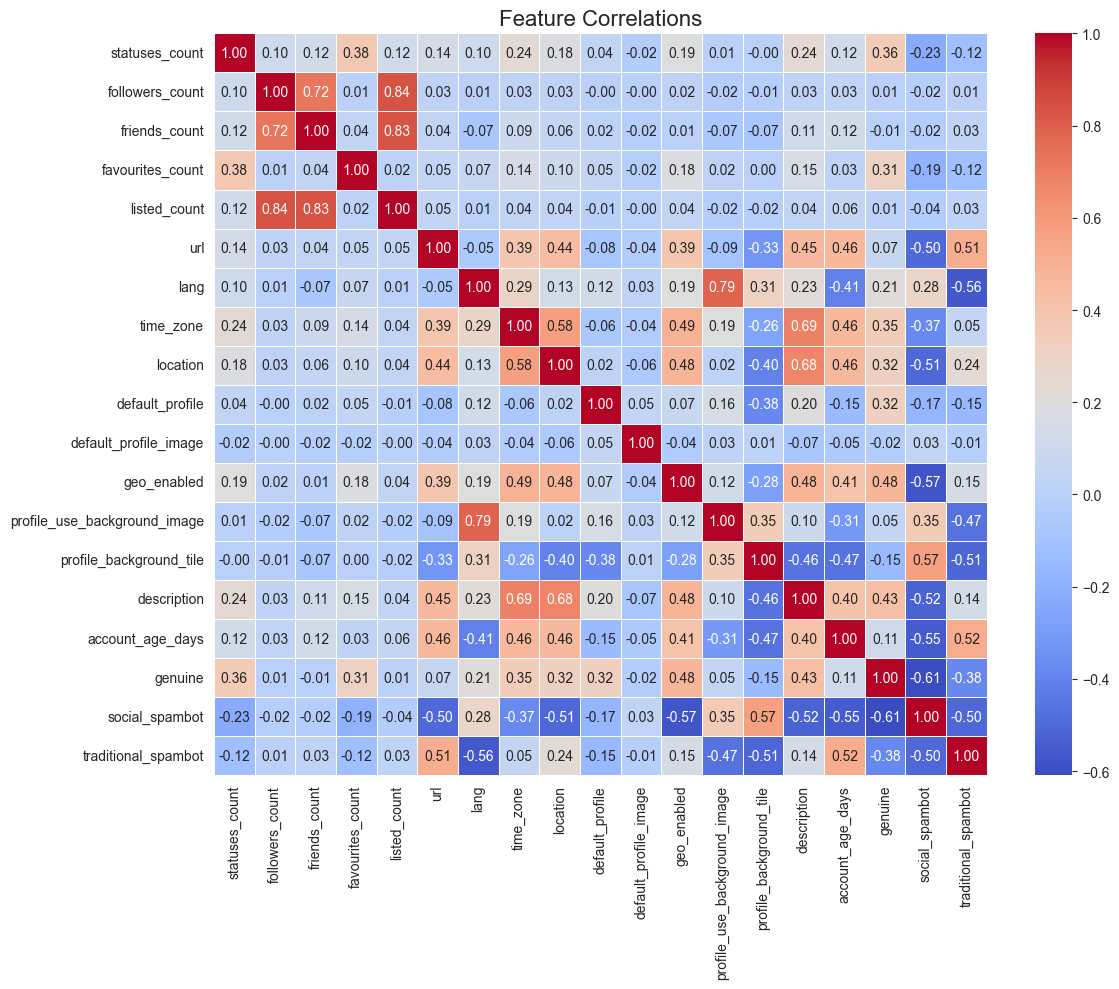

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    df_encoded.drop(columns=['label']).corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    linewidths=0.5
)
plt.title('Feature Correlations', fontsize=16)
plt.tight_layout()
plt.show()

(-100.0, 20000.0)

<Figure size 1000x600 with 0 Axes>

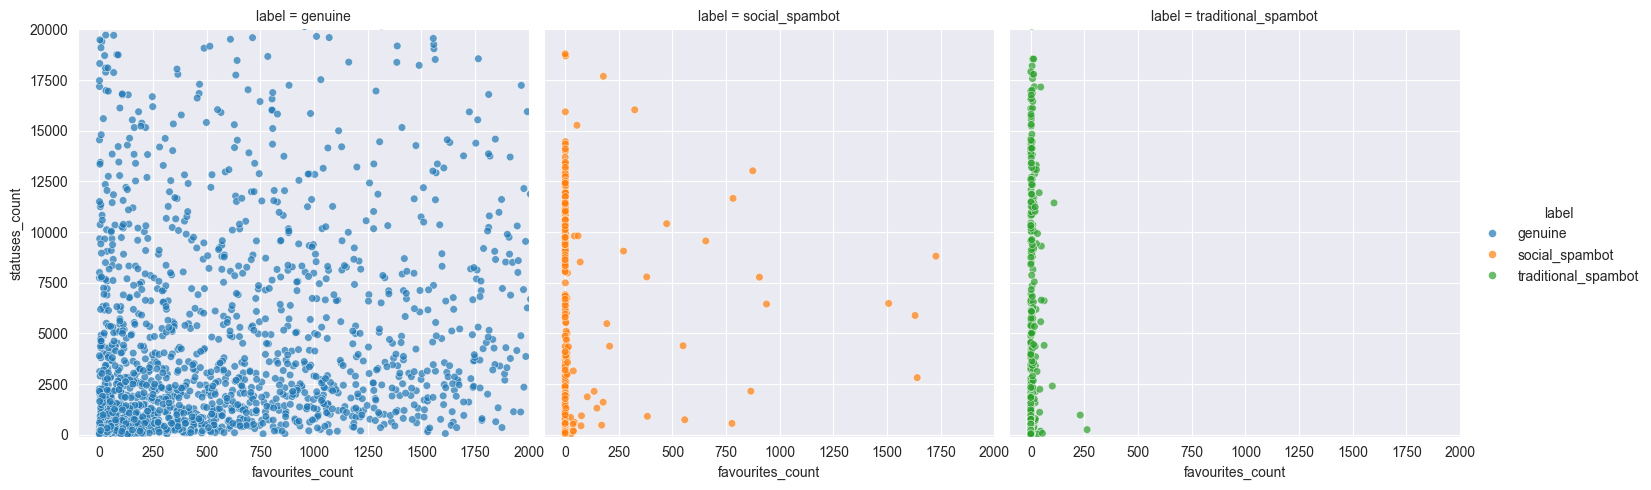

In [24]:
plt.figure(figsize=(10, 6))
sns.relplot(x="favourites_count",
            y='statuses_count',
            data=df_encoded,
            col="label",
            col_wrap=3,
            hue="label",
            s=30,
            alpha=0.7,
            color = 'blue')
plt.xlim([-100, 2000]) 
plt.ylim([-100, 20000]) 

(-100.0, 15000.0)

<Figure size 1000x600 with 0 Axes>

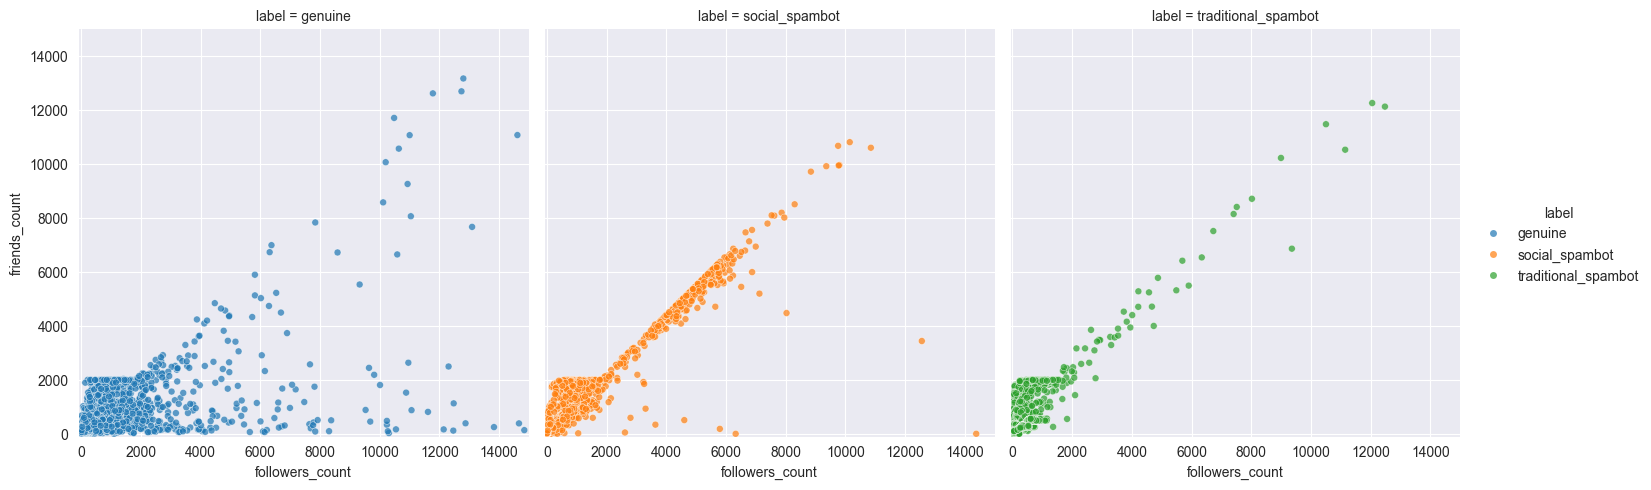

In [25]:
plt.figure(figsize=(10, 6))
sns.relplot(x="followers_count",
            y='friends_count',
            data=df_encoded,
            col="label",
            col_wrap=3,
            hue="label",
            s=25,
            alpha=0.7,
            color = 'blue')
plt.xlim([-100, 15000]) 
plt.ylim([-100, 15000]) 

(-100.0, 4000.0)

<Figure size 1000x600 with 0 Axes>

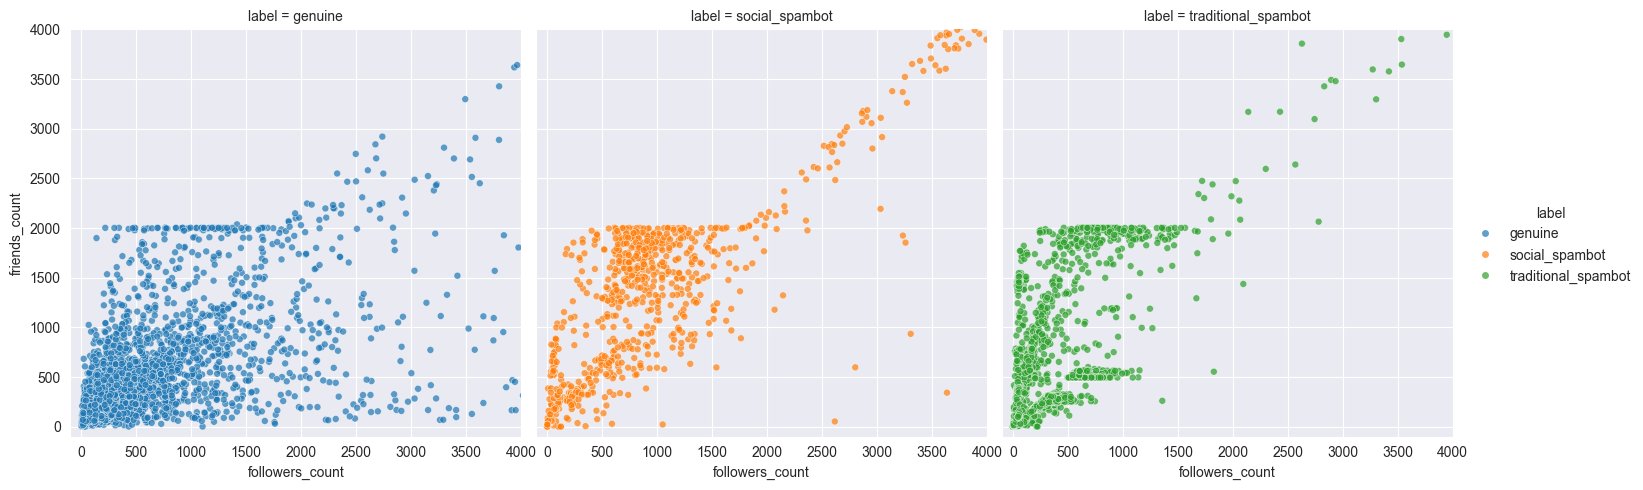

In [26]:
plt.figure(figsize=(10, 6))
sns.relplot(x="followers_count",
            y='friends_count',
            data=df_encoded,
            col="label",
            col_wrap=3,
            hue="label",
            s=25,
            alpha=0.7,
            color = 'blue')
plt.xlim([-100, 4000]) 
plt.ylim([-100, 4000]) 

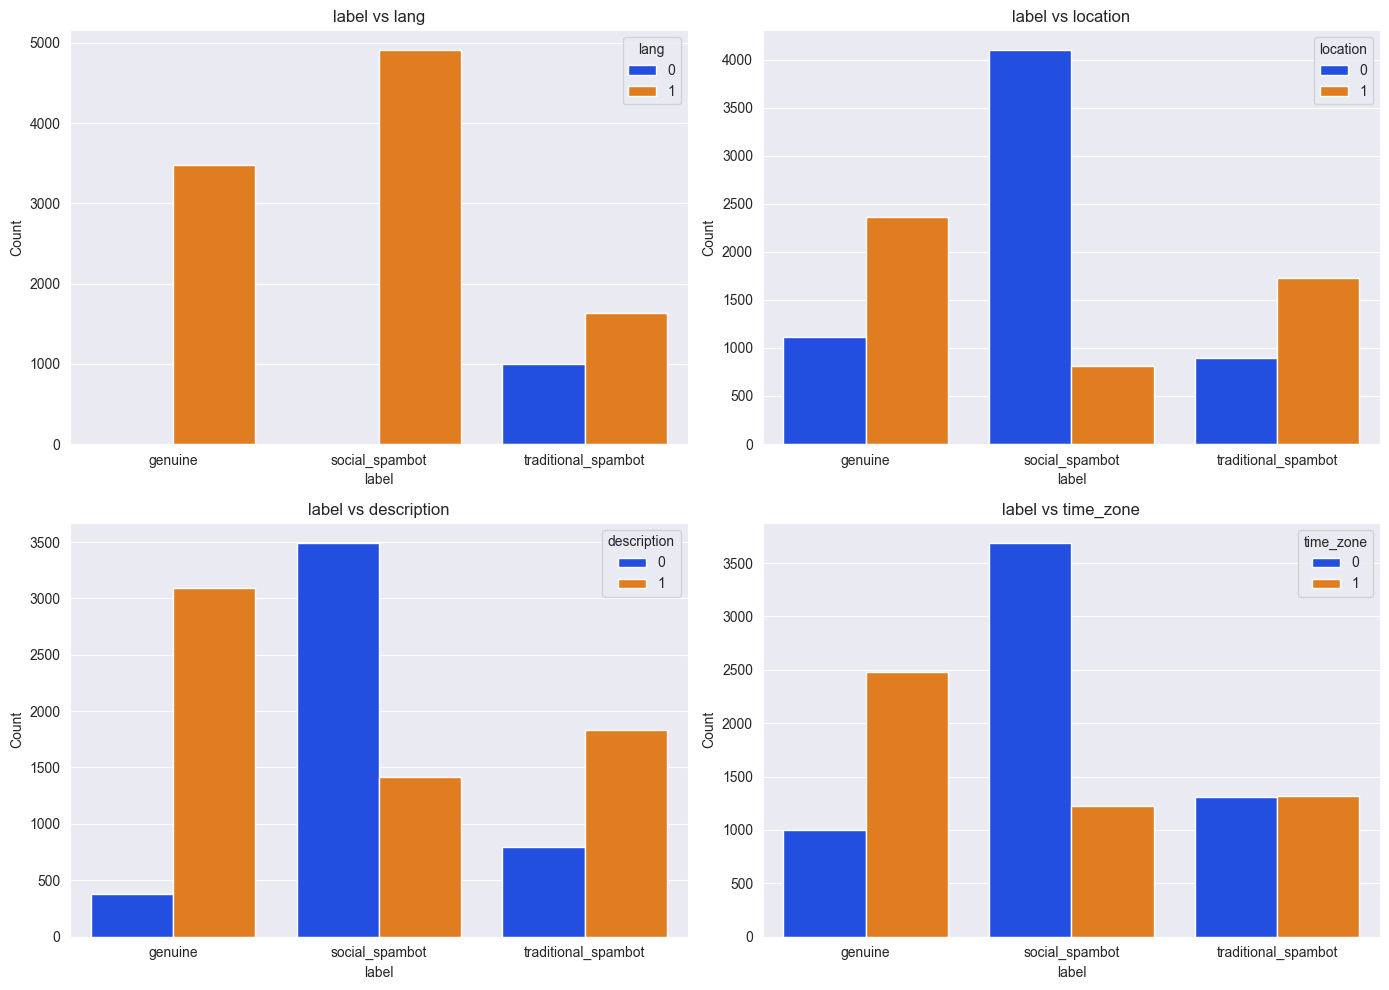

In [27]:
cols = ['lang','location','description','time_zone']
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.countplot(
        x='label',
        hue=col,
        data=df,
        ax=ax,
        palette='bright'
    )
    ax.set_title(f'label vs {col}')
    ax.set_xlabel('label')
    ax.set_ylabel('Count')
    ax.legend(title=col, loc='upper right')

plt.tight_layout()
plt.show()


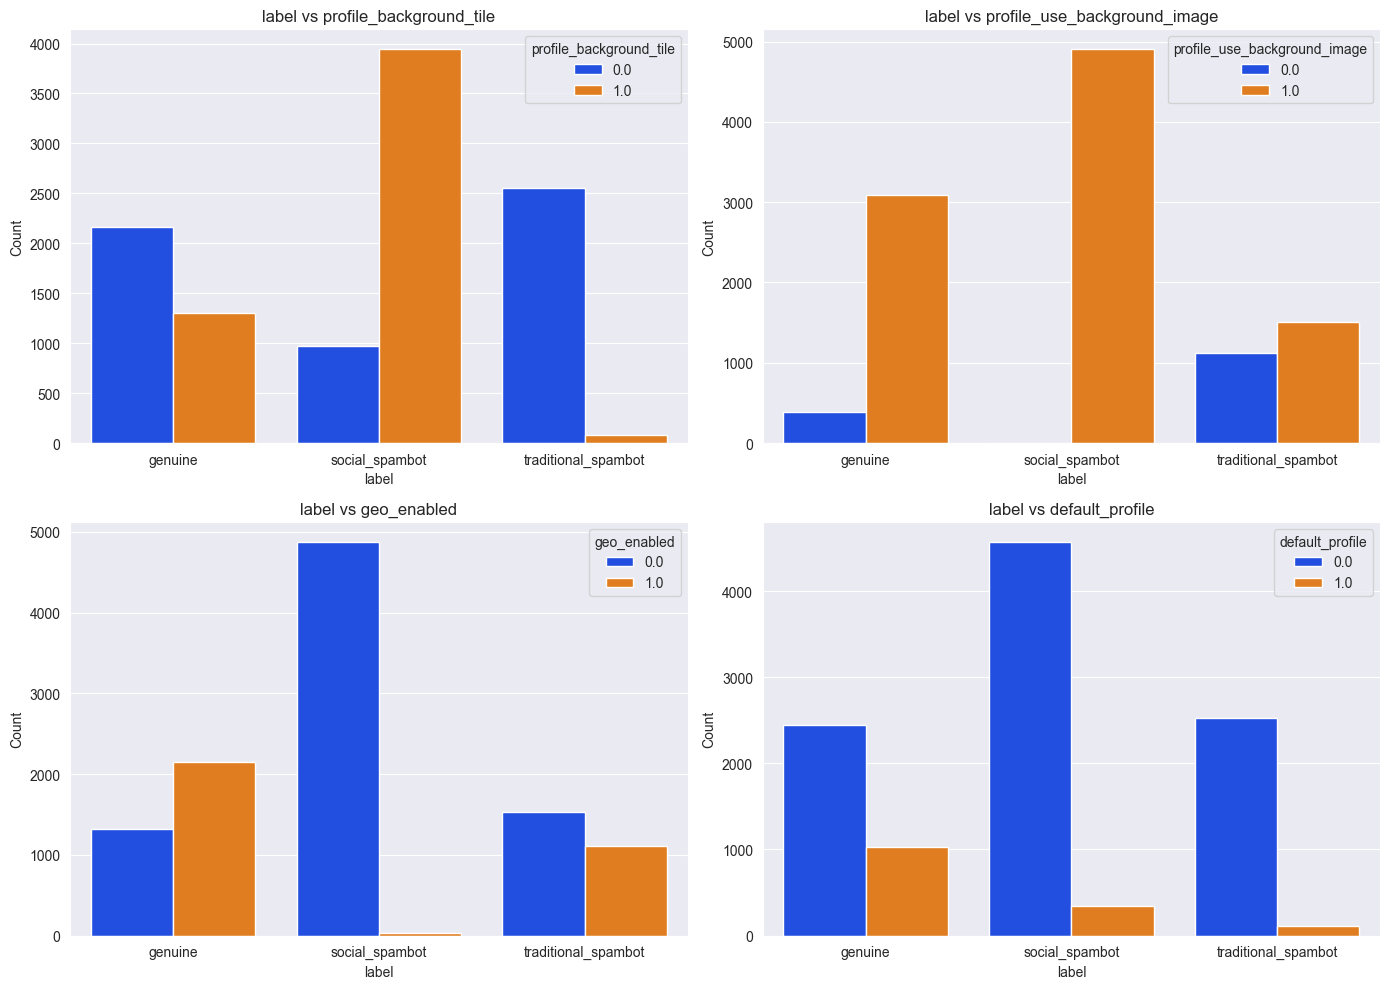

In [28]:
cols = ['profile_background_tile', 'profile_use_background_image', 'geo_enabled', 'default_profile']
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.countplot(
        x='label',
        hue=col,
        data=df,
        ax=ax,
        palette='bright'
    )
    ax.set_title(f'label vs {col}')
    ax.set_xlabel('label')
    ax.set_ylabel('Count')
    ax.legend(title=col, loc='upper right')

plt.tight_layout()
plt.show()


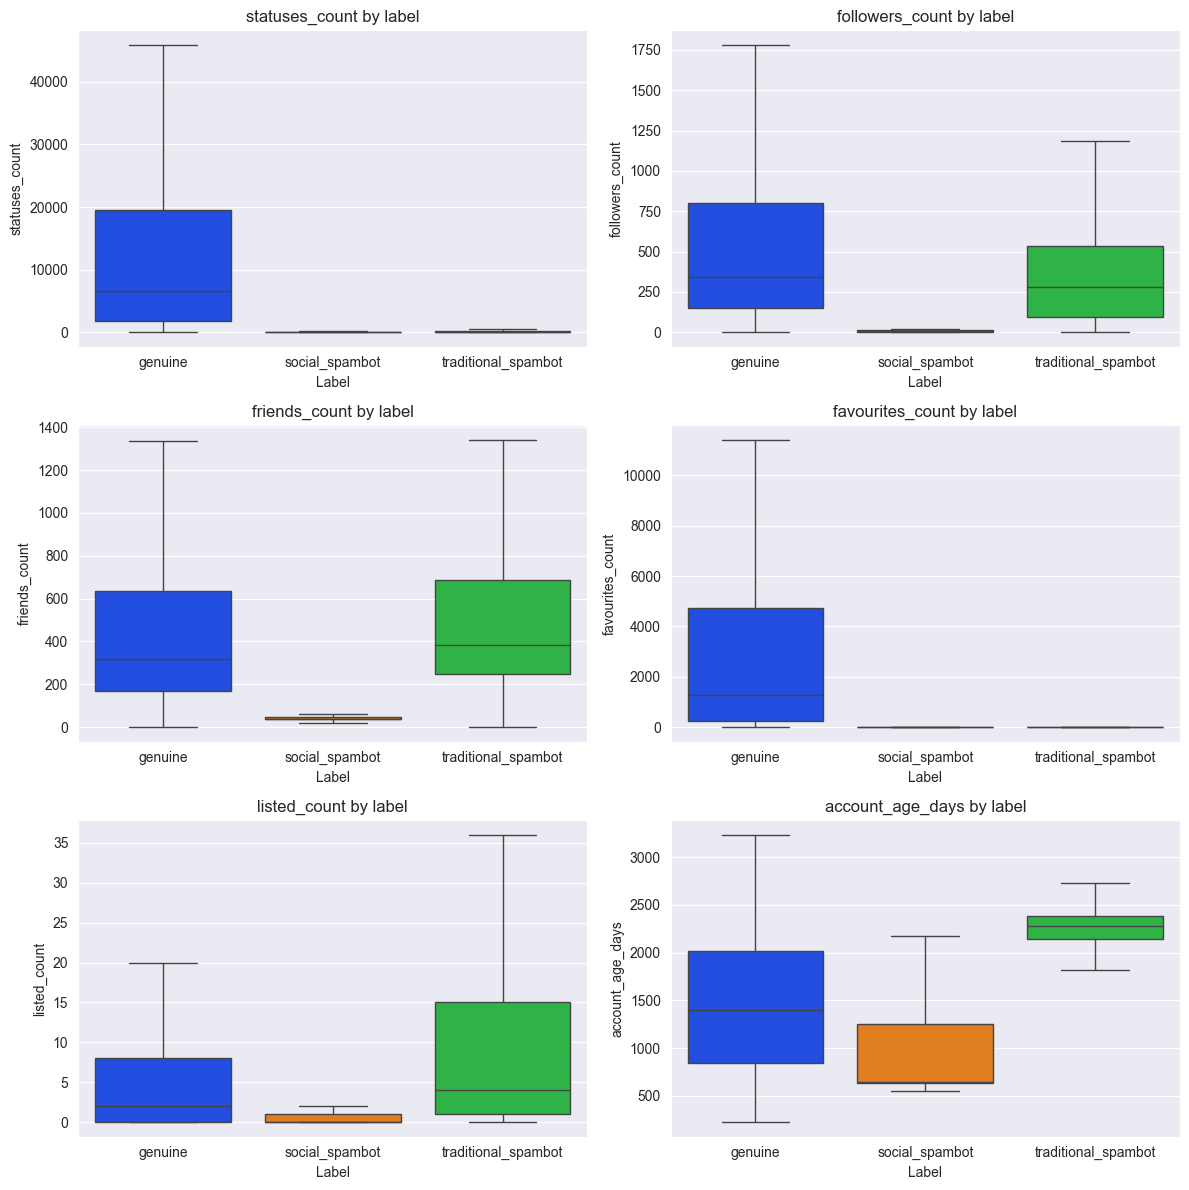

In [29]:
cols = [
    'statuses_count', 'followers_count', 'friends_count',
    'favourites_count', 'listed_count', 'account_age_days'
]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))  
axes = axes.flatten() 

for ax, col in zip(axes, cols):
    sns.boxplot(
        x='label',
        y=col,
        data=df,
        ax=ax,
        palette='bright',
        showfliers = False,
        hue = 'label'
    )
    ax.set_title(f'{col} by label')
    ax.set_xlabel('Label')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


Listed_count - _“The number of public lists that this user is a member of.”_

source: stackoverflow

Let's look closer to difference between social and tradition spambot

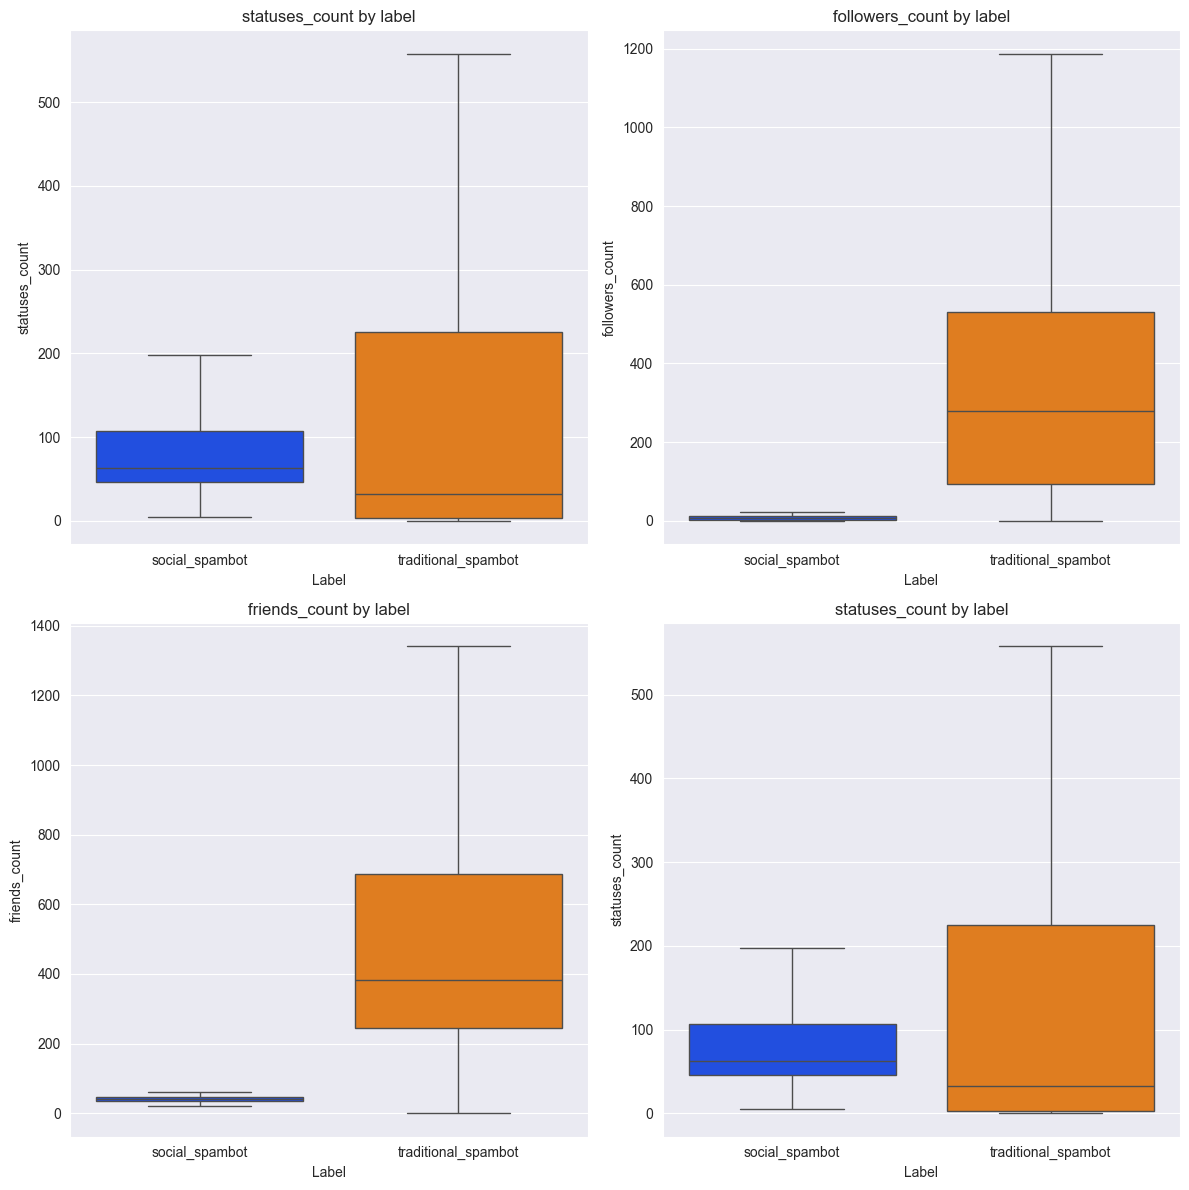

In [30]:
df2 = df[df['label'].isin(['social_spambot', 'traditional_spambot'])].copy()


cols = ['statuses_count','followers_count','friends_count',
        'statuses_count']

fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.boxplot(x='label', y=col, data=df2, ax=ax, palette='bright', showfliers = False, hue = 'label')
    ax.set_title(f'{col} by label')
    ax.set_xlabel('Label')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


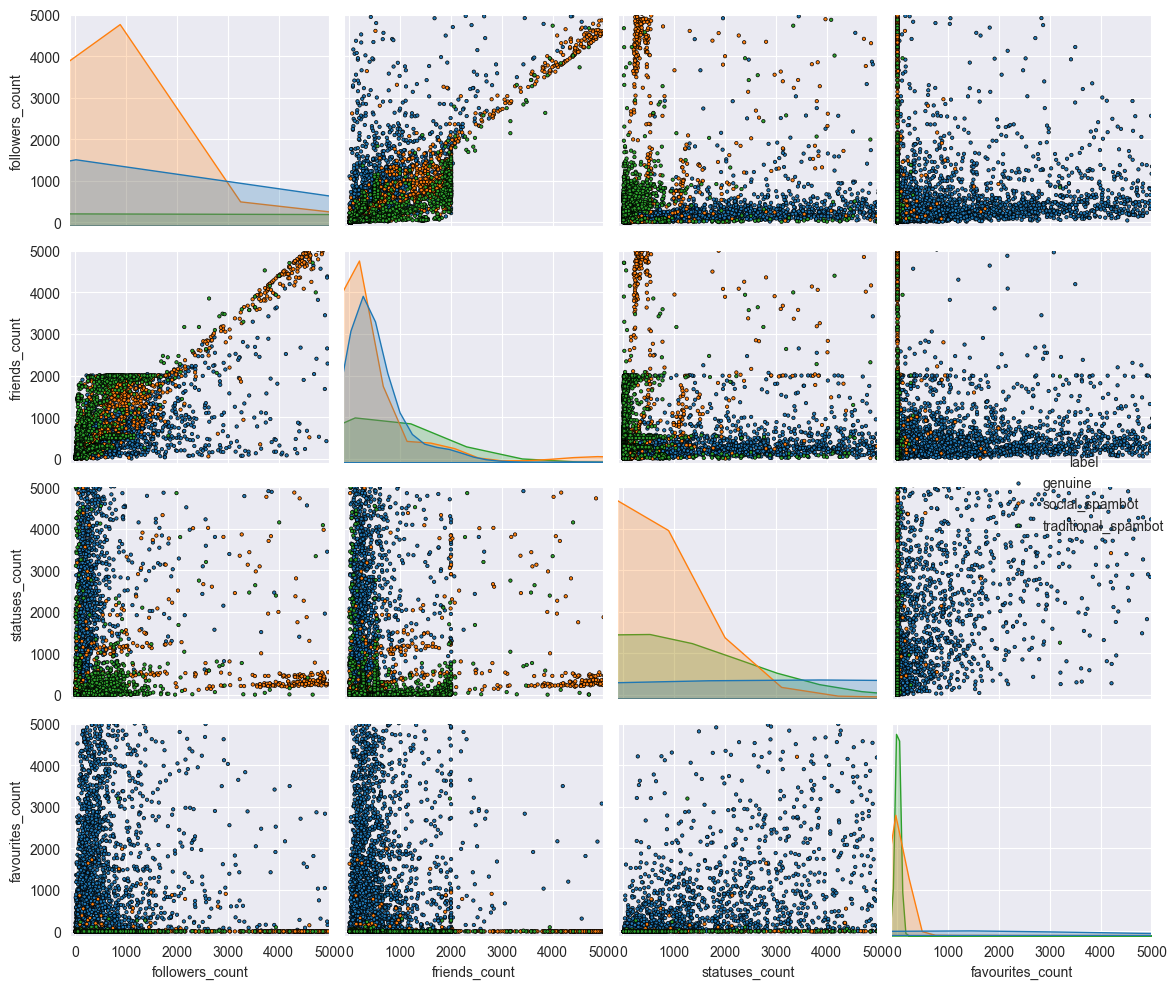

In [31]:
features = [
    'followers_count', 'friends_count', 'statuses_count',
    'favourites_count'
]

g = sns.pairplot(
    df_encoded,
    vars=features,
    hue='label',
    diag_kind='kde',
    plot_kws={'alpha': 1, 's': 6, 'edgecolor': 'k', 'linewidth': 0.5}
)


for ax in g.axes.flatten():
    if ax is not None and hasattr(ax, 'set_xlim'):
        ax.set_xlim(-100, 5000)  
        ax.set_ylim(-100, 5000) 
plt.tight_layout()
plt.show()


# Classification

## Firstly RECAP

### GINI show how pure our bag/region

If it goes to 0 than our bag consist mostly one class

If it goes to 1 than our bag/region consist not only one class

Example:

gini = 0  ==> 100%

gini = 0.5 ==> 50%:50%

### Precision 

% of labeled 'positive' were actually positive

### Recall 

% of 'positive' that were found from total

### F1 

$$
F_1 = 2 \cdot \frac{\mathrm{Precision} \times \mathrm{Recall}}
{\mathrm{Precision} + \mathrm{Recall}}
$$


In [154]:
df_dt = df_encoded.drop(columns=['genuine', 'social_spambot', 'traditional_spambot'])
# convert label 'genuine' to 0 , 'social_spambot' to 1 and 'traditional_spambot' to 2
df_dt['label'] = df_dt['label'].apply(lambda x: 0 if x == 'genuine' else 1 if x == 'social_spambot' else 2)

## Data splitting

Decision tree doesn't need scaling or normalization

In [79]:
X = df_dt.drop(columns=['label'])
y = df_dt['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)

_why some use '*y*' and others '*Y*'?_

but X always capital

In [94]:
DTclf = DecisionTreeClassifier(random_state=44)
DTclf.fit(X_train, y_train)

y_pred = DTclf.predict(X_test)

precision = precision_score(y_test, y_pred, zero_division=0, average='macro')
recall = recall_score(y_test, y_pred, zero_division=0, average='macro')
f1 = f1_score(y_test, y_pred, zero_division=0, average='macro')

precision, recall, f1

(0.9733895981063081, 0.9733875435066257, 0.9733792932747853)

These stats are general or average

Now lets take a look on each class

In [95]:
print(classification_report(
    y_test, y_pred,
    zero_division=0
))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1032
           1       0.98      0.98      0.98      1515
           2       0.98      0.99      0.98       759

    accuracy                           0.97      3306
   macro avg       0.97      0.97      0.97      3306
weighted avg       0.97      0.97      0.97      3306



<Axes: >

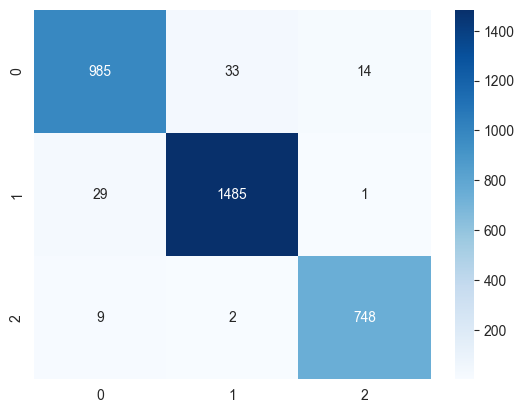

In [96]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

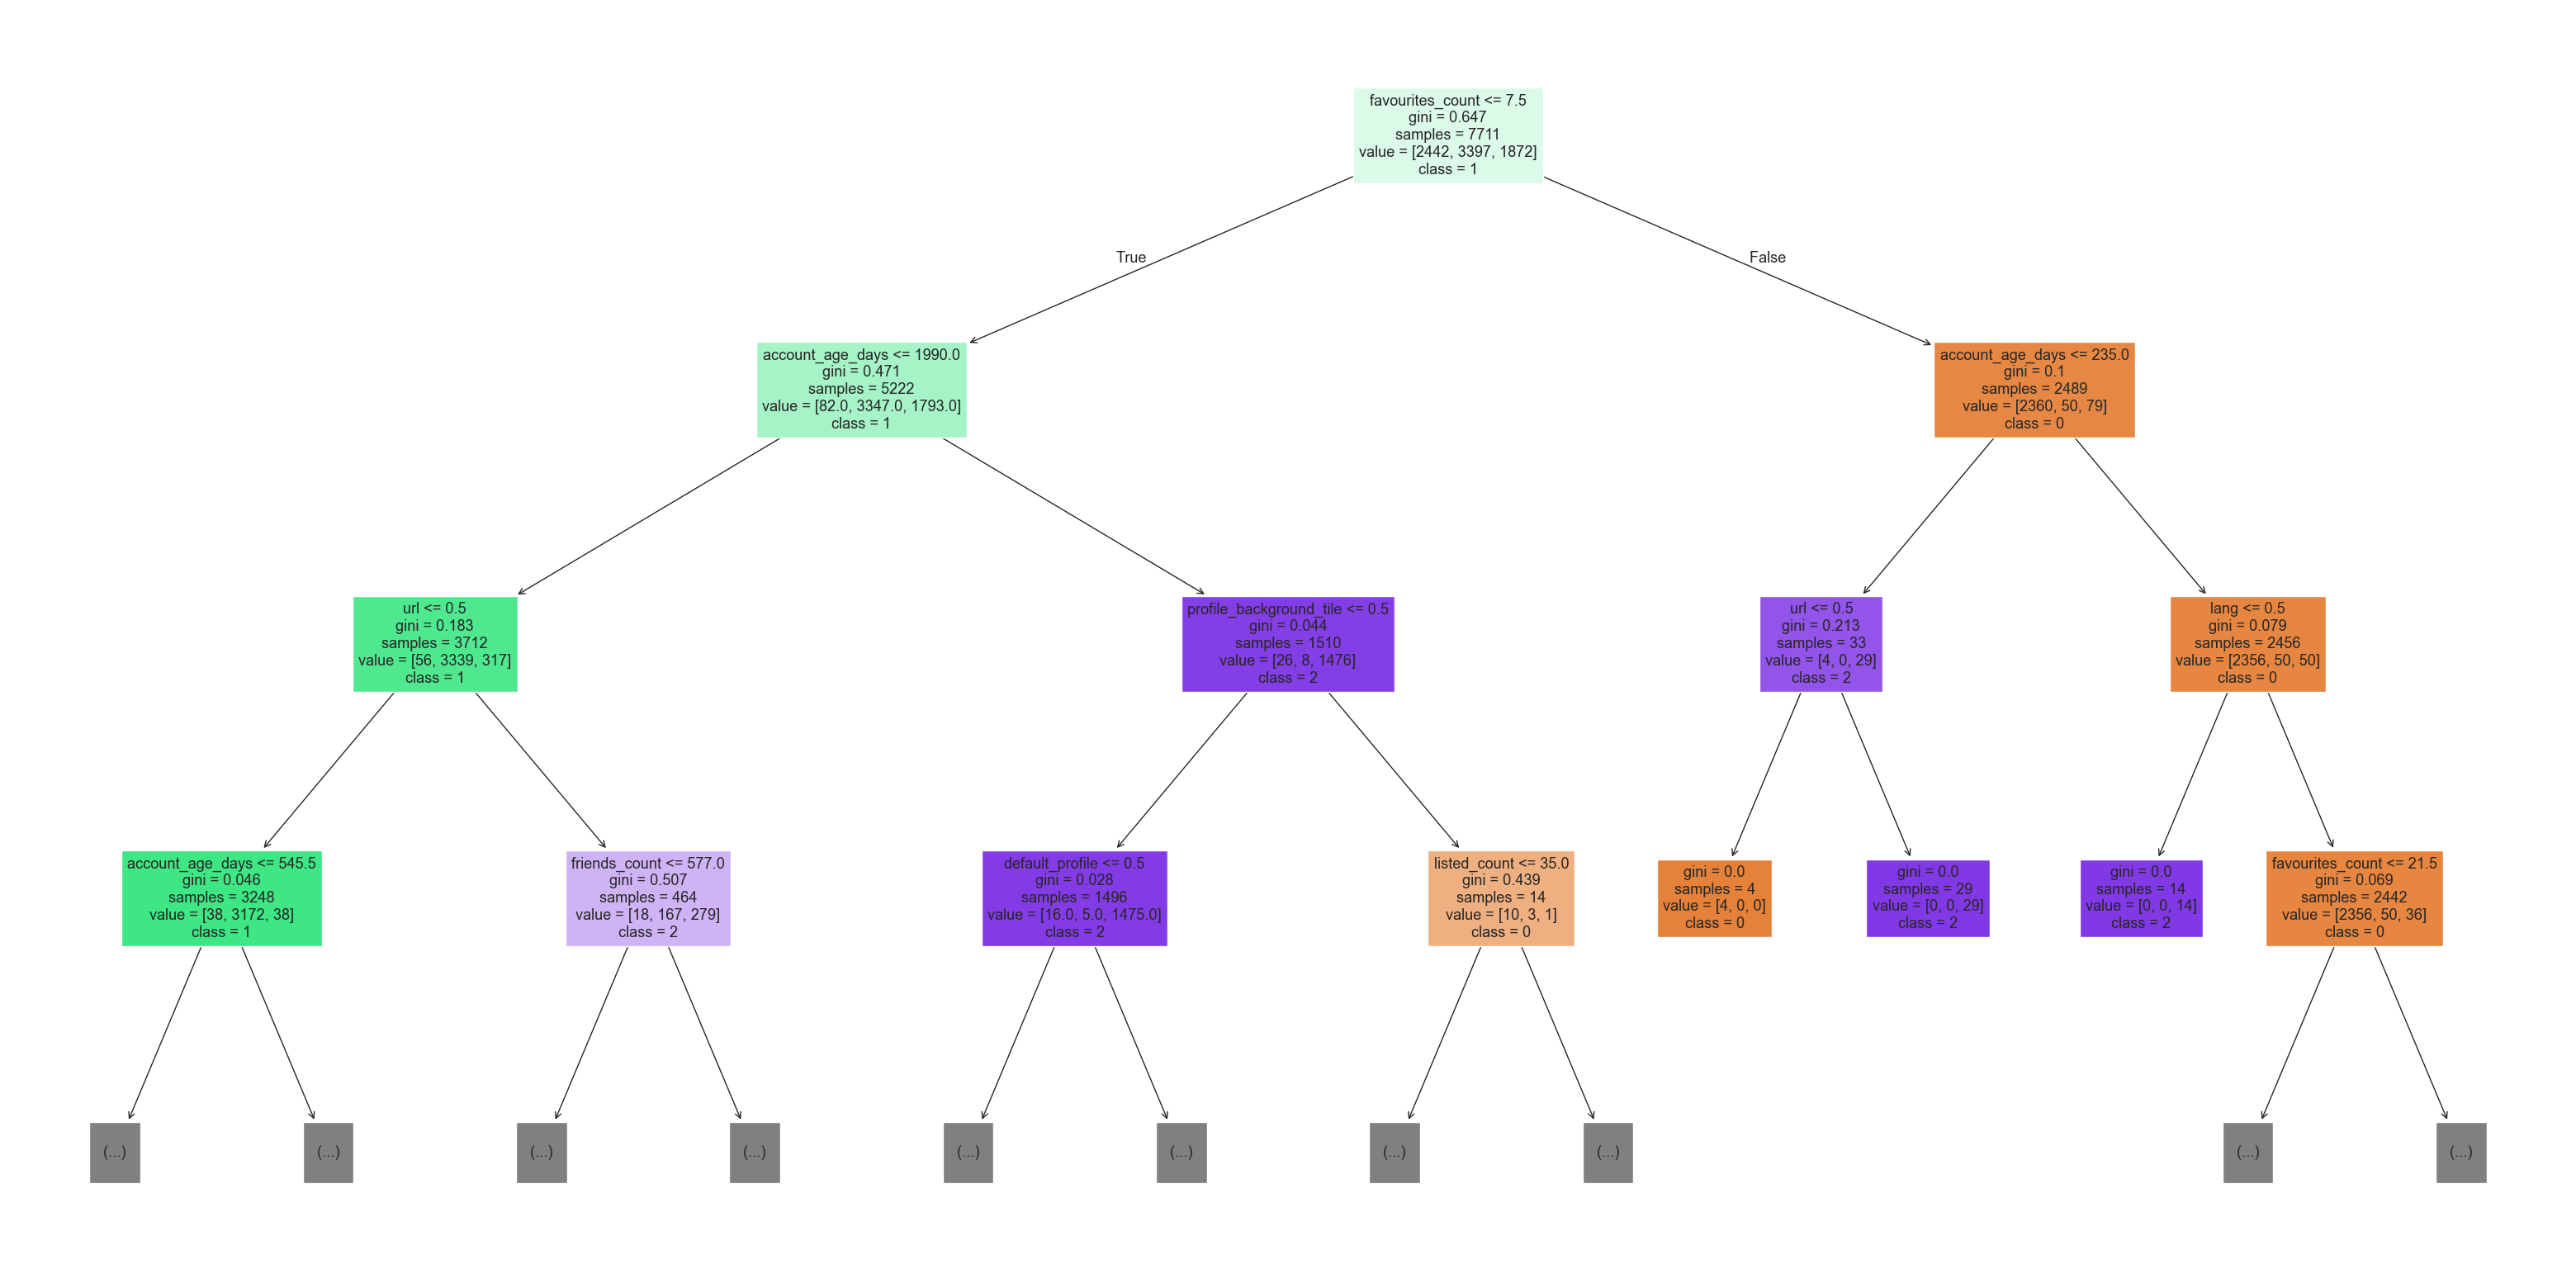

In [97]:
#DT Visualization
plt.figure(figsize=(40, 20))
plot_tree(DTclf, feature_names=X.columns, class_names=[str(cls) for cls in DTclf.classes_], filled=True, max_depth=3)
plt.show()

Do you even see anything???

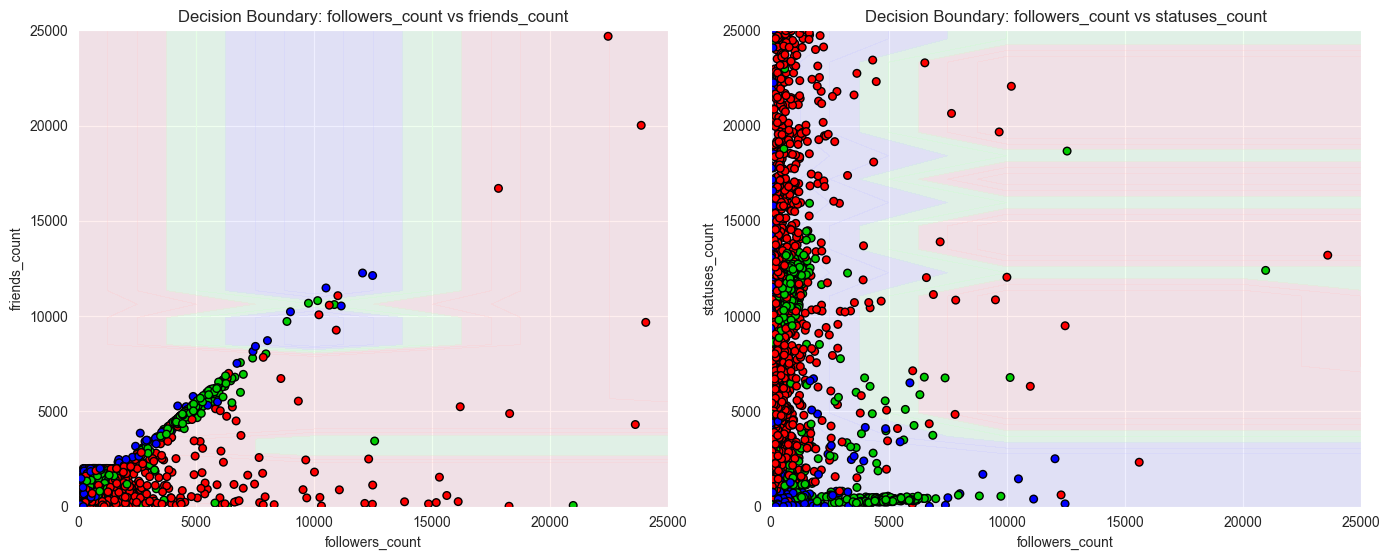

In [ ]:
pairs = [
    ('followers_count', 'friends_count'),
    ('followers_count', 'statuses_count')
]
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00CC00', '#0000FF'])

fig, axes = plt.subplots(1, 2, figsize=(2, 6))
for ax, (feat1, feat2) in zip(axes, pairs):
    X_pair = X_train[[feat1, feat2]].values
    y_arr  = y_train if isinstance(y_train, np.ndarray) else y_train.values

    clf = DecisionTreeClassifier(random_state=44)
    clf.fit(X_pair, y_arr)

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300),
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(
        X_pair[:, 0], X_pair[:, 1],
        c=y_arr, cmap=cmap_bold,
        edgecolor='k', s=30
    )
    ax.set_xlim(0, 25000)
    ax.set_ylim(0, 25000)
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    ax.set_title(f'Decision Boundary: {feat1} vs {feat2}')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


###  Decision tree with bootstraping

In [115]:
#DT with bootstraping
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=44),
    n_estimators=10,           # Number of trees
    bootstrap=True,            # Enable bootstrapping
    random_state=44
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

print(classification_report(
    y_test, y_pred,
    zero_division=0
))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1032
           1       0.99      0.98      0.99      1515
           2       0.99      0.99      0.99       759

    accuracy                           0.98      3306
   macro avg       0.98      0.99      0.98      3306
weighted avg       0.98      0.98      0.98      3306



<Axes: >

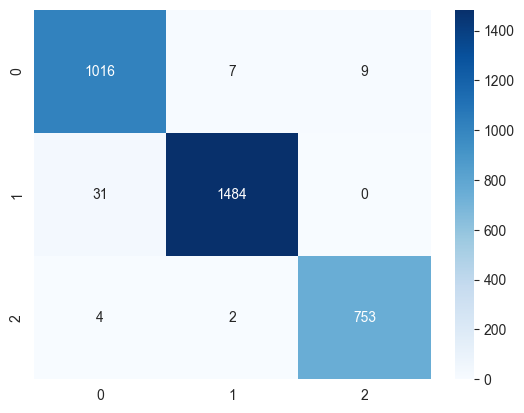

In [87]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [107]:
# Fit as before
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=44),
    n_estimators=10,
    bootstrap=True,
    random_state=44
)
bagging_clf.fit(X_train, y_train)

# Iterate and print a summary of each tree
for i, tree in enumerate(bagging_clf.estimators_):
    print(f"  Depth: {tree.get_depth()}, Leaves: {tree.get_n_leaves()}")


  Depth: 16, Leaves: 135
  Depth: 17, Leaves: 124
  Depth: 19, Leaves: 131
  Depth: 17, Leaves: 120
  Depth: 17, Leaves: 112
  Depth: 16, Leaves: 118
  Depth: 19, Leaves: 109
  Depth: 15, Leaves: 127
  Depth: 17, Leaves: 117
  Depth: 20, Leaves: 122


## DT with boosting

In [118]:
#DT with boosting
boosting_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=44),  # shallow trees = decision stumps
    n_estimators=10,
    learning_rate=1.0,
    random_state=44
)

boosting_clf.fit(X_train, y_train)

y_pred = boosting_clf.predict(X_test)

print(classification_report(
    y_test, y_pred,
    zero_division=0
))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1032
           1       0.92      0.98      0.95      1515
           2       0.96      0.85      0.90       759

    accuracy                           0.94      3306
   macro avg       0.95      0.93      0.94      3306
weighted avg       0.94      0.94      0.94      3306



<Axes: >

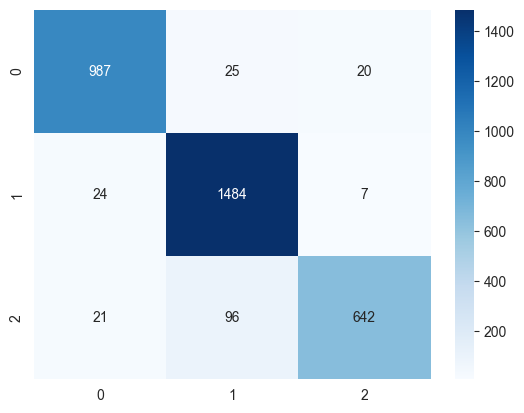

In [119]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

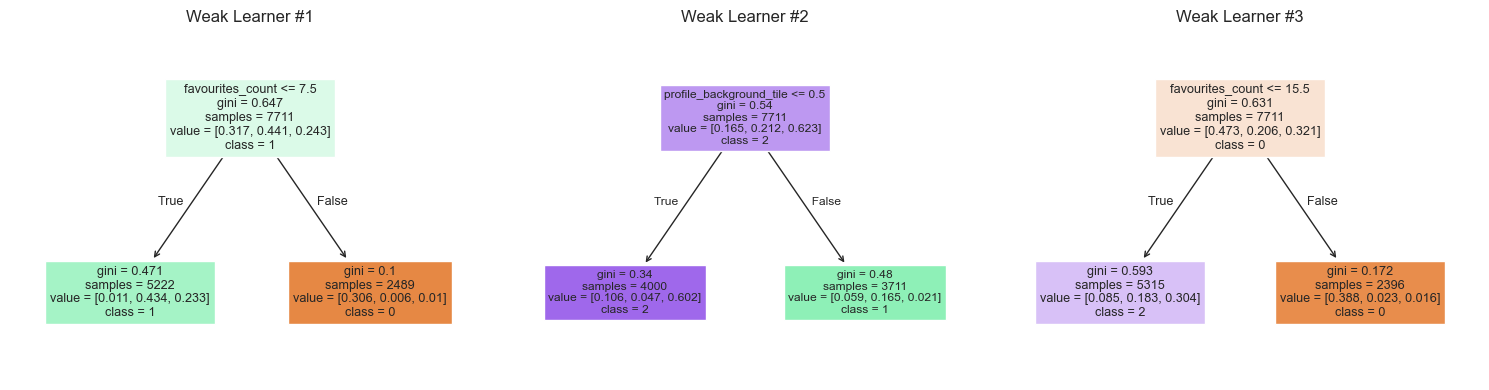

In [124]:
n_trees = 3
fig, axes = plt.subplots(1, n_trees, figsize=(n_trees * 5, 4))
for i, ax in enumerate(axes):
    plot_tree(
        boosting_clf.estimators_[i],
        feature_names=X_train.columns,
        class_names=boosting_clf.classes_.astype(str),
        filled=True,
        max_depth=3,
        ax=ax
    )
    ax.set_title(f'Weak Learner #{i+1}')
plt.tight_layout()
plt.show()


## Sigmoid Classifier

it is better to scale when using models that calculates

In [135]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [137]:
sigmoid_clf = LogisticRegression(
    multi_class='multinomial',   
    solver='lbfgs',
    class_weight='balanced',
    random_state=44,
    max_iter=1000
)

In [138]:
sigmoid_clf.fit(X_train_scaled, y_train)

/home/ruhalis/github/twitter-bot-classification/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=44)

In [139]:
y_pred = sigmoid_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1032
           1       0.94      0.97      0.95      1515
           2       0.92      0.96      0.94       759

    accuracy                           0.93      3306
   macro avg       0.93      0.93      0.93      3306
weighted avg       0.93      0.93      0.93      3306



<Axes: >

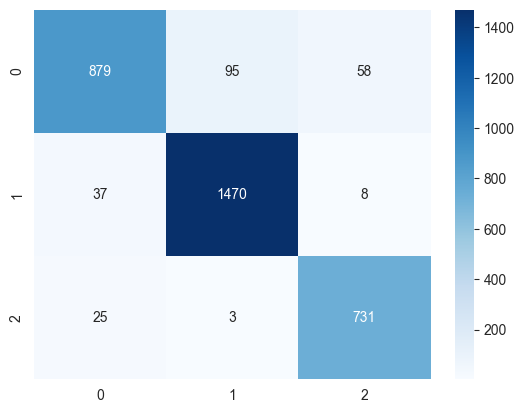

In [143]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [152]:
probs = sigmoid_clf.predict_proba(X_test_scaled)
ll = log_loss(y_test, probs)
ll


0.23678752834245223

If it converges to 0

than everything is good))

In [153]:
y_onehot = label_binarize(y_test, classes=sigmoid_clf.classes_)
mse = mean_squared_error(y_onehot, probs)
mse

0.035171214695561066

We can say variance is 0.035 with bias

so our predictions are in that distance from true target